In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
np.random.seed(0)

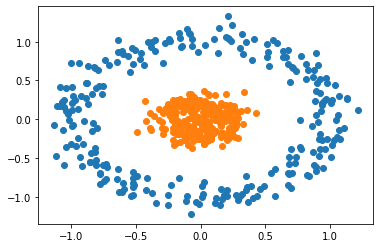

In [3]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)
#print(X) 
#print(y)
 
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [4]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

E:\Neural_Network\ANN\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [6]:
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs= 100, shuffle=True)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.4740
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4540
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5140
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4900
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4960
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5320
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5140
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5020
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 11/

Text(0.5, 0, 'epoch')

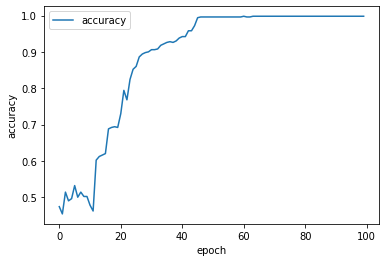

In [7]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

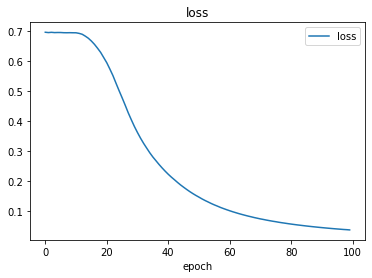

In [8]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [9]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

Prediction is:  [[0.16759342]]


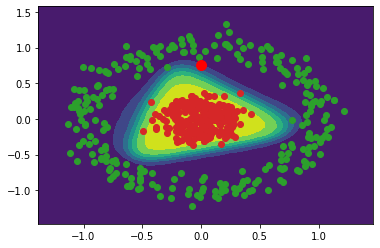

In [10]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])


x = 0
y = 0.75
 
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)